In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline
import geopandas as gpd

In [10]:
stepCSV = pd.read_csv("pghSteps.csv", index_col="id", parse_dates=True)
stepCSV.head(10)
 
#get rid of empty data
def filterEmpty(x):
    #print(x.iloc[0,5])

    return x.iloc[0,5] != None
stepData = stepCSV.groupby("number_of_steps").filter(filterEmpty)

#create neighborhood dictionary
stepCount = {}

#loop through data, adding step count for each entry to corresponding neighborhood
for i in range(len(stepData)):
    
    #check if key exists in dict
    if stepData.iloc[i,14] in stepCount:
        #print(stepData.iloc[i,5])
        stepCount[stepData.iloc[i,14]] += stepData.iloc[i,5]
    else:
        stepCount[stepData.iloc[i,14]] = stepData.iloc[i,5]

#realized I could do this more simply but I was building off my past labs so I did it this way ^^^



#sorting the data
def stepSort(x):
    return x[1]

stepList = [(key, value) for key, value in stepCount.items()] #can't sort a dictionary
stepSorted = sorted(stepList, key=stepSort)

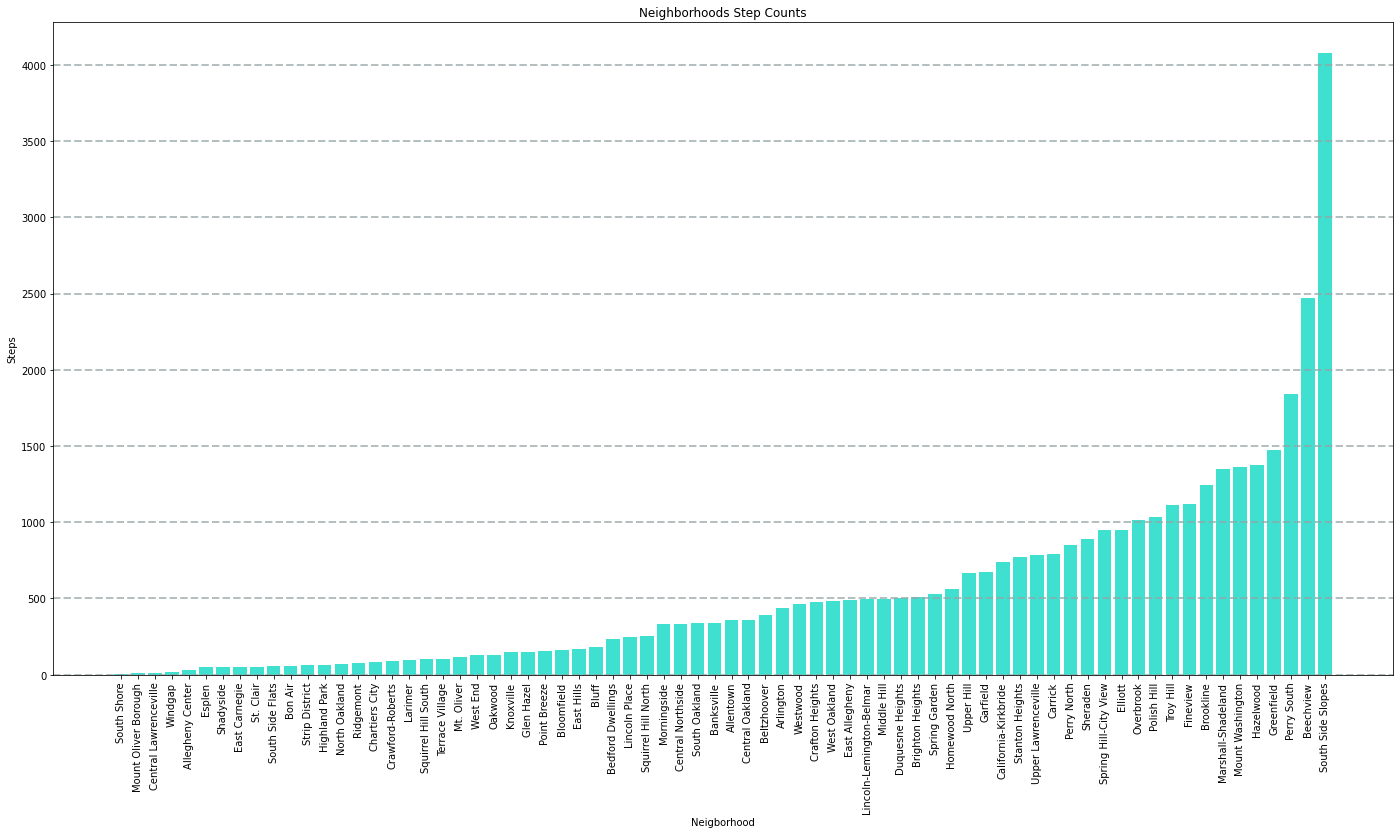

In [13]:
plt.bar(*zip(*stepSorted), color="turquoise")    #did some googling - zip and * used to pass the tuples to the plot
plt.title("Neighborhoods Step Counts")
plt.xlabel("Neigborhood")
plt.ylabel("Steps")
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (24,12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()


<AxesSubplot:>

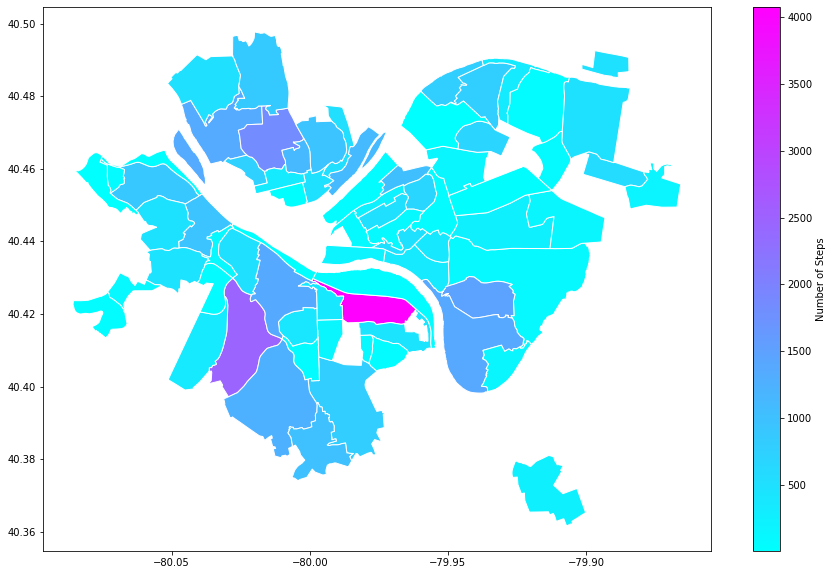

In [30]:
neighborhoods = gpd.read_file("http://pghgis-pittsburghpa.opendata.arcgis.com/datasets/dbd133a206cc4a3aa915cb28baa60fd4_0.zip") # read in the shapefile

stepDF = pd.DataFrame.from_dict(stepCount, orient='index', columns=['steps'])


stepsMap = neighborhoods.merge(stepDF, how='right', left_on='hood', right_index=True)

stepsMap.plot(column='steps', # set the data to be used for coloring
               cmap='cool',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Steps"}, # label the legend
               figsize=(15, 10),         # set the size
               )
#stepsMap.plot()
